

> *Importing all Libraries*



In [1]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.1 MB 11.6 MB/s 


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from fcmeans import FCM
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from prettytable import PrettyTable

# **DataSet1**



In [3]:
df1_url = 'https://drive.google.com/file/d/1PSjtqbDaAyzpwrOpfJQvHMXAIINsrlCD/view?usp=sharing'
df1_url = 'https://drive.google.com/uc?id=' + df1_url.split('/')[-2]
pre_df1 = pd.read_csv(df1_url)
x = pre_df1.columns[0]
y = pre_df1.columns[1]
pre_df1 = pre_df1.rename(columns={x: 'A'})
pre_df1 = pre_df1.rename(columns={y: 'B'})
pre_df1.loc[-1] = [np.float32(x), np.float32(y)]
pre_df1.index = pre_df1.index + 1
pre_df1.sort_index(inplace=True)
pre_df1.head()

,A,B
0,-0.125391,-1.268829
1,0.062522,1.278778
2,-0.048762,0.200549
3,0.105585,-0.496629
4,0.011886,-0.739317


In [4]:
# Scaling Data

scaler = StandardScaler()
df1 = scaler.fit_transform(pre_df1)

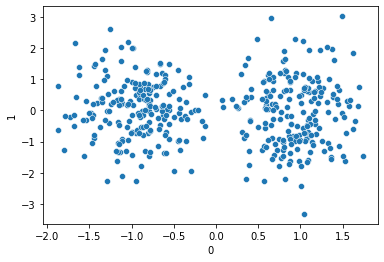

In [5]:
# DataSet1 ScatterPlot

sns.scatterplot(data= pd.DataFrame(df1), x = 0, y = 1)


1.   **Conectivity Models**

در این مدل مهم فاصله بین داده هاست، داده هایی که بهم نزدیک تر هستند شباهت بیشتری دارند. بر این اساس بیشتر دیتا پوینت ها در ۲ کلاستر دسته بندی می شوند، قطعا داده های پرت نیز وجود دارد که فاصله زیادی از دیگر نقاط دارد (مثل نقطه پایین سمت چپ) اما در کل نقاط زیادی روی هم افتاده اند و شباهت دارند


2.   **Centroid models**

از این نظر هم می توان دو سنتروئید برای دو کلاستر در نظر گرفت که هردو در وسط کلاستر ها قرار می گیرند


3.   **Distribution Models**

این مدل‌های خوشه‌بندی مبتنی بر این مفهوم هستند که چقدر احتمال دارد که همه نقاط داده در خوشه به یک توزیع تعلق داشته باشند. از این نظر شاید خیلی نتوان نظر قطعی داد چون تقسیم بندی داده ها بر اساس توزیع آسان نیست


4.   **Density Models**

این مدل‌ها فضای داده را برای مناطقی با چگالی متفاوت از نقاط داده در فضای داده جستجو می‌کنند. نواحی مختلف چگالی را جدا می کند و نقاط داده را در این مناطق در یک خوشه اختصاص می دهد. همانطور که مشخص است در مرکز شکل چگالی نقاط خیلی زیاد است و بر اساس همین دو مرکز پرچگال احتمالا داده ها به دو خوشه قابل تقسیم هستند.



*   ***K-Means***


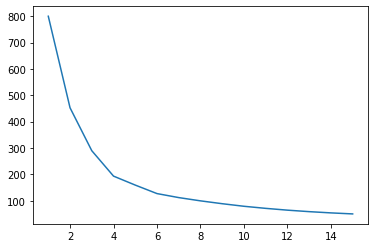

In [6]:
# Finding the best 'n_clusters' value
kmeans_error_df1 = []
k = []

for j in range(1, 16):
    kmeans = KMeans(n_clusters = j, random_state=0, n_init = 200).fit(df1)
    kmeans_error_df1.append(kmeans.inertia_)
    k.append(j)

sns.lineplot(y = kmeans_error_df1, x = k)

با توجه به نمودار فوق احتمالا بهترین مقدار برای این هایپرولیو نقاط بین ۲ تا ۴ هستند. تمام این نقاط امتحان شد تا بهترین خوشه بندی بدست آيد. نتیجه اینکه بهترین ولیو ۲ است

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


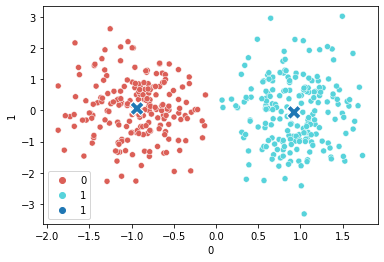

In [88]:
# Appling K-Means

kmeans = KMeans(n_clusters=2, random_state=0, n_init = 200).fit(df1)
kmeans_labels_df1 = kmeans.predict(df1)

kmeans_center = kmeans.cluster_centers_
sns.scatterplot(data= pd.DataFrame(df1), x = 0, y = 1, hue = kmeans_labels_df1, palette="hls")
sns.scatterplot(kmeans_center[:, 0], kmeans_center[:, 1], hue = 1, marker="X", s=200)
plt.show()


*   ***Fuzzy c-means (FCM)***



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


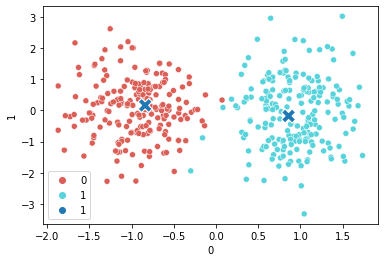

In [89]:
fcm_df1 = FCM(n_clusters=2)        # Using 'n_clusters' value optained from k-means
fcm_df1.fit(df1)
fcm_centers_df1 = fcm_df1.centers
fcm_labels_df1 = fcm_df1.predict(df1)

sns.scatterplot(data= pd.DataFrame(df1), x = 0, y = 1, hue = fcm_labels_df1, palette="hls")
sns.scatterplot(fcm_centers_df1[:, 0], fcm_centers_df1[:, 1], hue = 1,  marker="X", s=200)

*   ***DBSCAN***

این روش دو هایپرولیو مهم دارد که باید مقدار آنها را تعیین کرد:


*   Epsilon (ɛ)

حداکثر شعاع همسایه ها. اگر فاصله نقاط داده متقابل آنها کمتر یا مساوی با اپسیلون باشد، همسایه معتبر خواهند بود. یک اپسیلون بزرگتر خوشه های وسیع تری تولید می کند (شامل نقاط داده بیشتر) و یک اپسیلون کوچکتر خوشه های کوچک تری می سازد. برای تعیین عدد اپسیلون نمودار فاصله بر حسب اپسیلون را رسم می کنیم و با استفاده از روش زانو عدد بهینه را انتخاب می کنیم.



*   Minimum Points (minPts)

حداقل تعداد نقاط داده در شعاع یک همسایگی (یعنی اپسیلون) برای همسایگی که به عنوان خوشه در نظر گرفته شود. مقدار کم این ولیو به الگوریتم کمک می کند تا خوشه های بیشتری با نویز یا نقاط پرت بیشتر بسازد. مقدار بالاتر، خوشه‌های ریوست را تضمین می‌کند، اما اگر خیلی بزرگ باشد، خوشه‌های کوچک‌تر در خوشه‌های بزرگ‌تر گنجانده می‌شوند.
به طور معمول این مثدار را دو برابر تعداد فیچر ها در نظر میگیرند


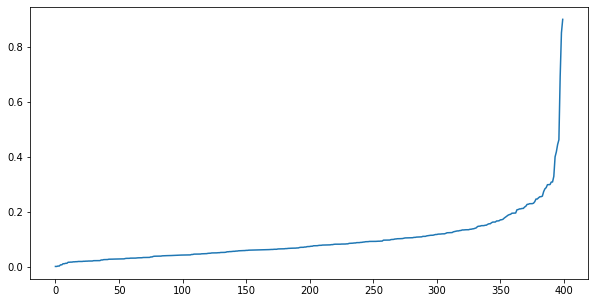

In [9]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(df1)
distances, idx = nn.kneighbors(df1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

مقداری که بهترین خوشه بندی را ارائه می دهد بین دو دهم تا چهار دهم است. این مقدار ها امتخان شدند تا بهترین آنها انتخاب شود. به طور کلی به نظر می رسد این مدل معیار خوبی برای سنجش چنین داده هایی نیست

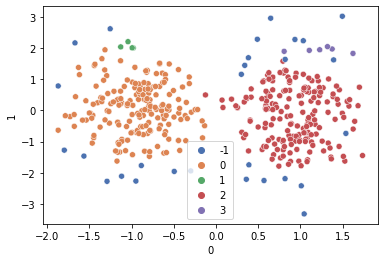

In [10]:
dbscan_df1 = DBSCAN(eps=0.3, min_samples=4).fit(df1)
dbscan_labels_df1 = dbscan_df1.fit_predict(df1)
sns.scatterplot(data= pd.DataFrame(df1), x = 0, y = 1, hue = dbscan_labels_df1, palette = "deep")

# **DataSet 2**

In [11]:
df2_url = 'https://drive.google.com/file/d/1ghSM4P6CODi5JrVlMftMf0G796Tokmko/view?usp=sharing'
df2_url = 'https://drive.google.com/uc?id=' + df2_url.split('/')[-2]
pre_df2 = pd.read_csv(df2_url)
x = pre_df2.columns[0]
y = pre_df2.columns[1]
pre_df2 = pre_df2.rename(columns={x: 'A'})
pre_df2 = pre_df2.rename(columns={y: 'B'})
pre_df2.loc[-1] = [np.float32(x), np.float32(y)]
pre_df2.index = pre_df2.index + 1
pre_df2.sort_index(inplace=True)
pre_df2.head()

,A,B
0,1.047961,0.357217
1,0.201221,0.295197
2,0.163506,-1.846756
3,0.876857,1.499314
4,1.389838,0.092843


In [12]:
# Scaling Data

scaler = StandardScaler()
df2 = scaler.fit_transform(pre_df2)

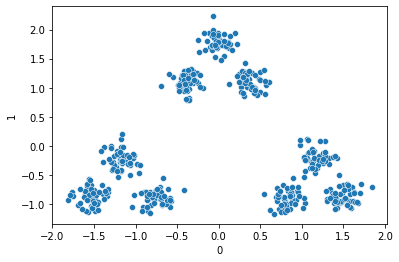

In [13]:
# DataSet1 ScatterPlot

sns.scatterplot(data= pd.DataFrame(df2), x = 0, y = 1)


1.   **Conectivity Models**

در این مدل مهم فاصله بین داده هاست، داده هایی که بهم نزدیک تر هستند شباهت بیشتری دارند. بر این اساس می توان داده ها را به ۳ کلاستر خوشه بندی کرد. البته همانطر که دیده می شود درون هر کلاستر می توان ۳ خوشه دیگر هم دید ولی فاصله بین کلاستری بسیار کمتر از فاصله بین کلاستر های متمایز ۳ گانه است.

2.   **Centroid models**

از این نظر می توان داده های را به ۳ خوشه دسته بندی کرد به این صورت که سنتروئید ها در بین فاصبه بین ۳ بهش درون هر کلساتر قرار می گیرند، این داده ها احتمالا به ۹ کلساتر تقسیم بندری نمی شوند چون بعضی از کلساتر ها اعضایی دارند که داده های درون آن به جد کافی به سنرتوئید مرکزی نزدیک نیستند که درون یک کلساتر ثرار گیرند همچنین در کلاستر پایینی دو دسته به هم بسیار نزدیک هستند که ممکن است یک کلاستر در نظر گرفته شوند

3.   **Distribution Models**

این مدل‌های خوشه‌بندی مبتنی بر این مفهوم هستند که چقدر احتمال دارد که همه نقاط داده در خوشه به یک توزیع تعلق داشته باشند. بنظر می رسد می توان داده ها را بر اسا این معیار به ۳ دسته تقسیم کرد



4.   **Density Models**

این مدل‌ها فضای داده را برای مناطقی با چگالی متفاوت از نقاط داده در فضای داده جستجو می‌کنند. نواحی مختلف چگالی را جدا می کند و نقاط داده را در این مناطق در یک خوشه اختصاص می دهد. بر این اساس احتمالا داده ها را بنوان به ۹ دسته تثسیم بندی کرد البته که با تثسیم به ۳ خوشه کلملا داده های هر خوشه متمرکز هستند و فاصبه بین دو خوشه داده ای دیده نمی شد


**Conclusion:**

به طور کلی باید گفت می توان داده ها را به ۳ 
دسته تقسیم کرد اما ممکن است بتوان به ۹ خوشه نیز خوشه بندی را انجام داد. برای اطمینان باید از الگوریتم های زیر برای خوشه بندی استقاده کینم:



*   ***K-Means***


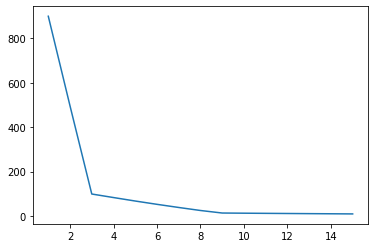

In [14]:
# Finding the best 'n_clusters' value

kmeans_error_df2 = []
k = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init = 200).fit(df2)
    kmeans_error_df2.append(kmeans.inertia_)
    k.append(i)

sns.lineplot(y = kmeans_error_df2, x = k)

با توجه به نمودار فوق احتمالا بهترین مقدار برای این هایپرولیو نقطه ۳ است. تمام  نقاط اطراف نیز امتحان شد تا بهترین خوشه بندی بدست آيد. نتیجه اینکه بهترین ولیو ۳ است

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


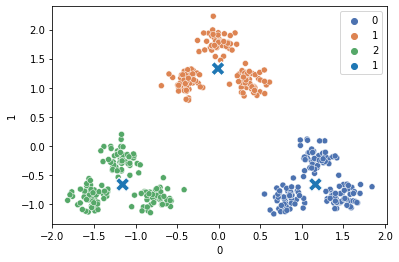

In [90]:
# Appling K-Means

kmeans = KMeans(n_clusters=3, random_state=0, n_init = 200).fit(df2)
kmeans_labels_df2 = kmeans.predict(df2)

kmeans_center = kmeans.cluster_centers_
sns.scatterplot(data= pd.DataFrame(df2), x = 0, y = 1, hue = kmeans_labels_df2, palette = "deep")
sns.scatterplot(kmeans_center[:, 0], kmeans_center[:, 1], hue = 1,  marker="X", s=200)


بر اساس فرض ممکن بود بتوان داده هار ار به ۹ دسته نیز تقسیم بندی کرد همانطور که مشاهده می کنید این الگوریتم کاملا و به درستی داده ها را به ۹ کلاستر خوشه بندی کرده است.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


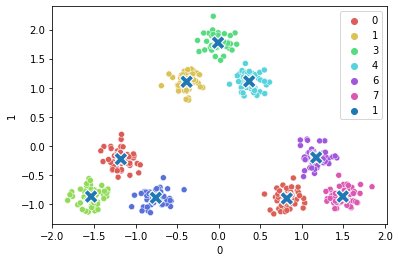

In [91]:
# Appling K-Means


kmeans = KMeans(n_clusters=9, random_state=0, n_init = 200).fit(df2)
kmeans_labels_df2_var = kmeans.predict(df2)
kmeans_center = kmeans.cluster_centers_

sns.scatterplot(data= pd.DataFrame(df2), x = 0, y = 1, hue = kmeans_labels_df2_var, palette="hls")
sns.scatterplot(kmeans_center[:, 0], kmeans_center[:, 1], hue = 1,  marker="X", s=200)



*   ***Fuzzy c-means (FCM)***



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


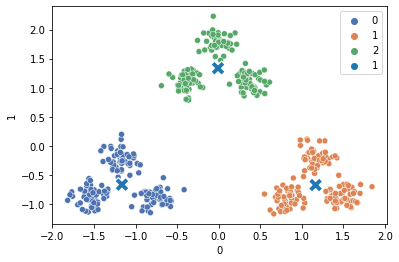

In [92]:
fcm_df2 = FCM(n_clusters=3)        # Using 'n_clusters' value optained from k-means
fcm_df2.fit(df2)
fcm_centers_df2 = fcm_df2.centers
fcm_labels_df2 = fcm_df2.predict(df2)

sns.scatterplot(data= pd.DataFrame(df2), x = 0, y = 1, hue = fcm_labels_df2, palette = "deep")
sns.scatterplot(fcm_centers_df2[:, 0], fcm_centers_df2[:, 1], hue = 1,  marker="X", s=200)

بر خلاف انتظار این الگوریتم نتوانسته داده ها را به درستی به ۹ کلاستر تقسیم بندی کند ولی تقسیم بندی برای ۳ کلاستر به درستی انجام شده است.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


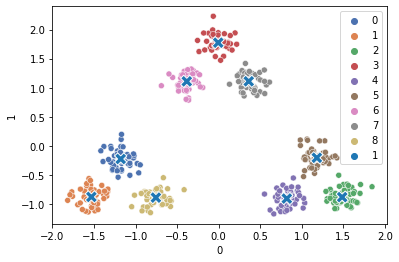

In [94]:
fcm_df2_var = FCM(n_clusters=9)        # Using 'n_clusters' value optained from k-means
fcm_df2_var.fit(df2)
fcm_centers_df2_var = fcm_df2_var.centers
fcm_labels_df2_var = fcm_df2_var.predict(df2)

sns.scatterplot(data= pd.DataFrame(df2), x = 0, y = 1, hue = fcm_labels_df2_var, palette = "deep")
sns.scatterplot(fcm_centers_df2_var[:, 0], fcm_centers_df2_var[:, 1], hue = 1,  marker="X", s=150)

*   ***DBSCAN***

این روش دو هایپرولیو مهم دارد که باید مقدار آنها را تعیین کرد:


*   Epsilon (ɛ)

حداکثر شعاع همسایه ها. اگر فاصله نقاط داده متقابل آنها کمتر یا مساوی با اپسیلون باشد، همسایه معتبر خواهند بود. یک اپسیلون بزرگتر خوشه های وسیع تری تولید می کند (شامل نقاط داده بیشتر) و یک اپسیلون کوچکتر خوشه های کوچک تری می سازد. برای تعیین عدد اپسیلون نمودار فاصله بر حسب اپسیلون را رسم می کنیم و با استفاده از روش زانو عدد بهینه را انتخاب می کنیم.



*   Minimum Points (minPts)

حداقل تعداد نقاط داده در شعاع یک همسایگی (یعنی اپسیلون) برای همسایگی که به عنوان خوشه در نظر گرفته شود. مقدار کم این ولیو به الگوریتم کمک می کند تا خوشه های بیشتری با نویز یا نقاط پرت بیشتر بسازد. مقدار بالاتر، خوشه‌های ریوست را تضمین می‌کند، اما اگر خیلی بزرگ باشد، خوشه‌های کوچک‌تر در خوشه‌های بزرگ‌تر گنجانده می‌شوند.
به طور معمول این مثدار را دو برابر تعداد فیچر ها در نظر میگیرند


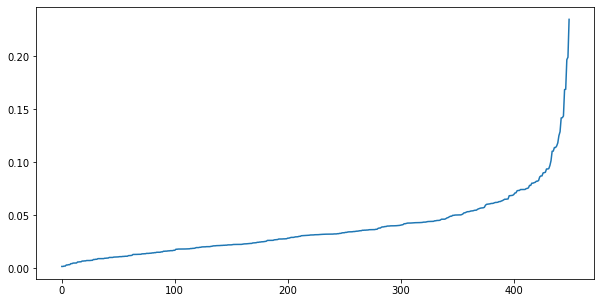

In [19]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(df2)
distances, idx = nn.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

مقداری که بهترین خوشه بندی را ارائه می دهد بین ۰.۰۵ تا ۰.۱ است. این مقدار ها امتحان شدند تا بهترین آنها انتخاب شود. به طور کلی به نظر می رسد این مدل معیار خوبی برای سنجش چنین داده هایی نیست

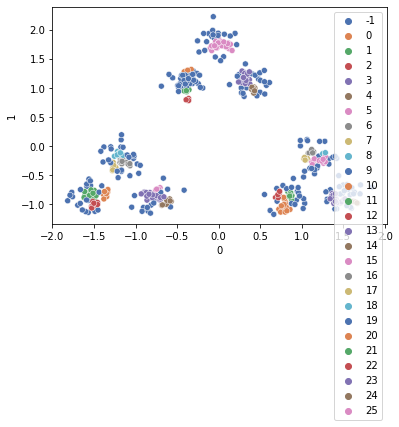

In [20]:
dbscan_df2 = DBSCAN(eps= 0.055, min_samples=4).fit(df2)
dbscan_labels_df2 = dbscan_df2.fit_predict(df2)
sns.scatterplot(data= pd.DataFrame(df2), x = 0, y = 1, hue = dbscan_labels_df2, palette = "deep")

در ۰.۱۵ به نظر می رسد داده ها به خوبی به ۹ کلاتر تقسیم بندی شده اند اما این عدد از روی نمودار خطی فوق بدست نمی آید چون بالاتر از زانو است. السته که همانطور که میبینید برخی داده ها اصلا در نظر گرفته نشده اند و به عنوان داده پرت تلقی شده اند.

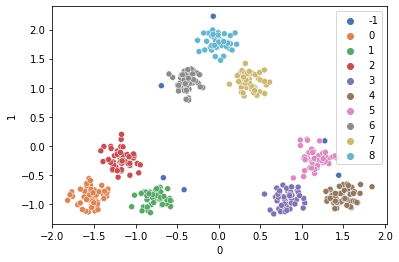

In [21]:
dbscan_df2 = DBSCAN(eps= 0.15, min_samples=4).fit(df2)
dbscan_labels_df2 = dbscan_df2.fit_predict(df2)
sns.scatterplot(data= pd.DataFrame(df2), x = 0, y = 1, hue = dbscan_labels_df2, palette = "deep")

# **DataSet3**



In [22]:
df3_url = 'https://drive.google.com/file/d/1XTDaWz9bxAvCdzLoS2qpoStgEeHX_8KH/view?usp=sharing'
df3_url = 'https://drive.google.com/uc?id=' + df3_url.split('/')[-2]
pre_df3 = pd.read_csv(df3_url)
x = pre_df3.columns[0]
y = pre_df3.columns[1]
pre_df3 = pre_df3.rename(columns={x: 'A'})
pre_df3 = pre_df3.rename(columns={y: 'B'})
pre_df3.loc[-1] = [np.float32(x), np.float32(y)]
pre_df3.index = pre_df3.index + 1
pre_df3.sort_index(inplace=True)
pre_df3.head()

,A,B
0,0.315715,0.230080
1,-0.420268,0.609144
2,0.102944,-1.117928
3,-0.105657,-0.112488
4,-0.674778,0.130790


In [23]:
# Scaling Data

scaler = StandardScaler()
df3 = scaler.fit_transform(pre_df3)

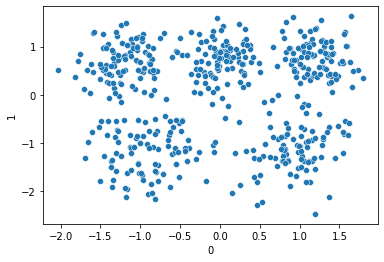

In [24]:
# DataSet1 ScatterPlot

sns.scatterplot(data= pd.DataFrame(df3), x = 0, y = 1)


1.   **Conectivity Models**

در این مدل مهم فاصله بین داده هاست، داده هایی که بهم نزدیک تر هستند شباهت بیشتری دارند. بر این اساس سه دسته بالایی را می توان به عنوان سه خوشه در نظر گرفت اما فاصله داده ها در دو دسته پایینی بسیار زیاد است و برخی داده ها مابین دو خوشه قرار گرفته اند که ممکن است سبب خطا شوند

2.   **Centroid models**

از این نظر می توان ۳ سنتروئید به وضوح برگزید در صورت انتخاب دو سنتروید دیگر برای دو دسته پایین ممکن است با تکرار الگوریتم نقطه ثابتی بدست نیاید چون داده های میانی ممکن است در دو کلاستر جداگانه قرار گیرند 


3.   **Distribution Models**

این مدل‌های خوشه‌بندی مبتنی بر این مفهوم هستند که چقدر احتمال دارد که همه نقاط داده در خوشه به یک توزیع تعلق داشته باشند. از این نظر بنظر میرسد داده های دسته ها به طور یکسانی در دسته ها بالایی توزیع شده اند(راست ترین خوشه کمتر) همچنین برای خوشه پایینی راست شاید بتوان توزیع یکسانی در نظر گرفت ولی برای توزیع پایین راست داده ها احتمالا از توزیع یکسانی پیروی نمی کنند


4.   **Density Models**

این مدل‌ها فضای داده را برای مناطقی با چگالی متفاوت از نقاط داده در فضای داده جستجو می‌کنند. نواحی مختلف چگالی را جدا می کند و نقاط داده را در این مناطق در یک خوشه اختصاص می دهد. همانطور که مشخص است در سه دسته بالا داده ها تثریبا متمرکز هستند ولی در دو دسته پایین (خصوصا سمت چپی) چگالی داده ها پایین است.


*   ***K-Means***


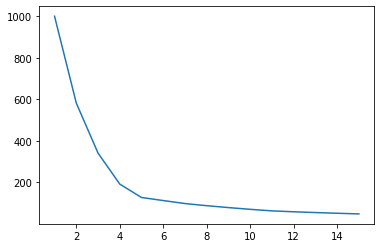

In [25]:
# Finding the best 'n_clusters' value
kmeans_error_df3 = []
k = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init = 200).fit(df3)
    kmeans_error_df3.append(kmeans.inertia_)
    k.append(i)

sns.lineplot(y = kmeans_error_df3, x = k)

با توجه به نمودار فوق احتمالا بهترین مقدار برای این هایپرولیو نقاط بین ۴ تا ۶ هستند. تمام این نقاط امتحان شد تا بهترین خوشه بندی بدست آيد. نتیجه اینکه بهترین ولیو ۵ است

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


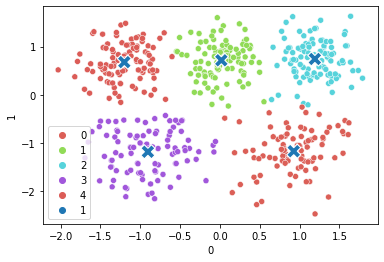

In [95]:
# Appling K-Means


kmeans = KMeans(n_clusters=5, random_state=0, n_init = 200).fit(df3)
kmeans_labels_df3 = kmeans.predict(df3)
kmeans_center = kmeans.cluster_centers_

sns.scatterplot(data= pd.DataFrame(df3), x = 0, y = 1, hue = kmeans_labels_df3, palette="hls")
sns.scatterplot(kmeans_center[:, 0], kmeans_center[:, 1], hue = 1,  marker="X", s=200)
plt.show()


*   ***Fuzzy c-means (FCM)***



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


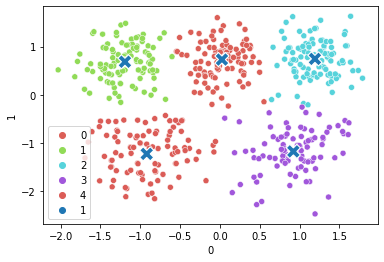

In [96]:
fcm_df3 = FCM(n_clusters=5)        # Using 'n_clusters' value optained from k-means
fcm_df3.fit(df3)
fcm_centers_df3 = fcm_df3.centers
fcm_labels_df3 = fcm_df3.predict(df3)

sns.scatterplot(data= pd.DataFrame(df3), x = 0, y = 1, hue = fcm_labels_df3, palette="hls")
sns.scatterplot(fcm_centers_df3[:, 0], fcm_centers_df3[:, 1], hue = 1,  marker="X", s=200)

*   ***DBSCAN***

این روش دو هایپرولیو مهم دارد که باید مقدار آنها را تعیین کرد:


*   Epsilon (ɛ)

حداکثر شعاع همسایه ها. اگر فاصله نقاط داده متقابل آنها کمتر یا مساوی با اپسیلون باشد، همسایه معتبر خواهند بود. یک اپسیلون بزرگتر خوشه های وسیع تری تولید می کند (شامل نقاط داده بیشتر) و یک اپسیلون کوچکتر خوشه های کوچک تری می سازد. برای تعیین عدد اپسیلون نمودار فاصله بر حسب اپسیلون را رسم می کنیم و با استفاده از روش زانو عدد بهینه را انتخاب می کنیم.



*   Minimum Points (minPts)

حداقل تعداد نقاط داده در شعاع یک همسایگی (یعنی اپسیلون) برای همسایگی که به عنوان خوشه در نظر گرفته شود. مقدار کم این ولیو به الگوریتم کمک می کند تا خوشه های بیشتری با نویز یا نقاط پرت بیشتر بسازد. مقدار بالاتر، خوشه‌های ریوست را تضمین می‌کند، اما اگر خیلی بزرگ باشد، خوشه‌های کوچک‌تر در خوشه‌های بزرگ‌تر گنجانده می‌شوند.
به طور معمول این مثدار را دو برابر تعداد فیچر ها در نظر میگیرند


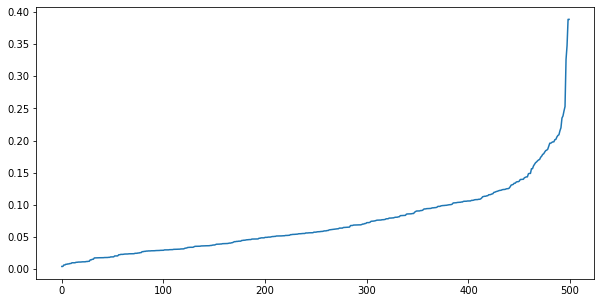

In [28]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(df3)
distances, idx = nn.kneighbors(df3)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

مقداری که بهترین خوشه بندی را ارائه می دهد بین ۰.۱۵ تا ۰.۲ است. این مقدار ها امتخان شدند تا بهترین آنها انتخاب شود. به طور کلی به نظر می رسد این مدل معیار خوبی برای سنجش چنین داده هایی نیست

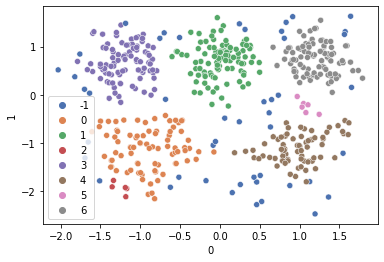

In [29]:
dbscan_df3 = DBSCAN(eps=0.2, min_samples=4).fit(df3)
dbscan_labels_df3 = dbscan_df3.fit_predict(df3)
sns.scatterplot(data= pd.DataFrame(df3), x = 0, y = 1, hue = dbscan_labels_df3, palette = "deep")

### **Conclusion**

In [98]:
table = PrettyTable()
table.field_names = ['Data/Algo', 'K-means', 'Fuzzy C-means', 'DBSCAN', 'Best Algo', 'Worst Algo']
table.add_row(['DataSet1', silhouette_score(df1, kmeans_labels_df1), silhouette_score(df1, fcm_labels_df1), silhouette_score(df1, dbscan_labels_df1), 'K-means', 'DBSCAN'])
table.add_row(['DataSet2', silhouette_score(df2, kmeans_labels_df2), silhouette_score(df2, fcm_labels_df2), silhouette_score(df2, dbscan_labels_df2), 'Kmeans / Fuzzy c-means', 'DBSCAN'])
table.add_row(['DataSet3', silhouette_score(df3, kmeans_labels_df3), silhouette_score(df3, fcm_labels_df3), silhouette_score(df3, dbscan_labels_df3), 'Kmeans / Fuzzy c-means', 'DBSCAN'])
print(table.get_string())

+-----------+--------------------+--------------------+---------------------+------------------------+------------+
| Data/Algo |      K-means       |   Fuzzy C-means    |        DBSCAN       |       Best Algo        | Worst Algo |
+-----------+--------------------+--------------------+---------------------+------------------------+------------+
|  DataSet1 | 0.439586319776932  | 0.4379944681660304 |  0.2896304250433866 |        K-means         |   DBSCAN   |
|  DataSet2 | 0.7245804211851823 | 0.7245804211851823 |  0.6753831883422251 | Kmeans / Fuzzy c-means |   DBSCAN   |
|  DataSet3 | 0.5356904748860325 | 0.5356904748860325 | 0.34225375156896587 | Kmeans / Fuzzy c-means |   DBSCAN   |
+-----------+--------------------+--------------------+---------------------+------------------------+------------+


Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

> 1: Means clusters are well apart from each other and clearly distinguished.

> 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

> -1: Means clusters are assigned in the wrong way.

Silhouette Score = (b - a) / max(a, b)

where **a** = average intra-cluster distance i.e the average distance between each point within a cluster and **b** = average inter-cluster distance i.e the average distance between all clusters.

با توجه به توضیحات، نتایج بهترین و بدترین الگوریتم ها در جدول آمده است. آنچه واضح است این است که الگوریتم دی بی اسکن نمیتواند به خوبی این سه دیتاست را خوشه بندی کند  